In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import linear_model
from yahoofinancials import YahooFinancials as yfs
import seaborn as sns
import yfinance as yf
%matplotlib widget
sns.set_style("darkgrid")
sns.set(font_scale=1.7)

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
def pair(buy_ticker,sell_ticker):

    ticker1 = yf.Ticker(buy_ticker)
    ticker2 = yf.Ticker(sell_ticker)
    beta_ticker = yf.Ticker("SPY")

    dataFrame1 = ticker1.history(
        start='2010-1-1', actions=True, rounding=True)
    dataFrame2 = ticker2.history(
        start='2010-1-1', actions=True, rounding=True)
    spy = beta_ticker.history(
        start='2010-1-1', actions=True, rounding=True)

    ratio = dataFrame1.Close / dataFrame2.Close
    spread = dataFrame1.Close - dataFrame2.Close

    chart = fig, axes = plt.subplots(3, figsize=(18, 12))
    axes[0].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=dataFrame1, x="Date", y="Close",
                ax=axes[0], label=buy_ticker)
    sns.lineplot(data=dataFrame2, x="Date", y="Close",
                ax=axes[0], label=sell_ticker)
    axes[1].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=ratio, ax=axes[1])
    axes[2].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=spread, ax=axes[2])
    plt.tight_layout(pad=1)

    spy_ticker1 = pd.concat([spy.Close[-500::], dataFrame1.Close[-500::]], axis=1)
    spy_ticker1.columns = ["SPY", buy_ticker]
    long_data_pct = np.log(spy_ticker1/spy_ticker1.shift())
    ticker1_cov = long_data_pct.cov().iloc[0, 1]
    ticker1_var = long_data_pct["SPY"].var()
    long_beta = ticker1_cov/ticker1_var
    print("Long BETA:", np.round(long_beta, 2))
    
    spy_ticker2 = pd.concat([spy.Close[-500::], dataFrame2.Close[-500::]], axis=1)
    spy_ticker2.columns = ["SPY", sell_ticker]
    short_data_pct = np.log(spy_ticker2/spy_ticker2.shift())
    ticker2_cov = short_data_pct.cov().iloc[0, 1]
    ticker2_var = short_data_pct["SPY"].var()
    short_beta = ticker2_cov/ticker2_var
    print("Short BETA:", np.round(short_beta, 2))

    return chart

Long BETA: 1.01
Short BETA: 1.02


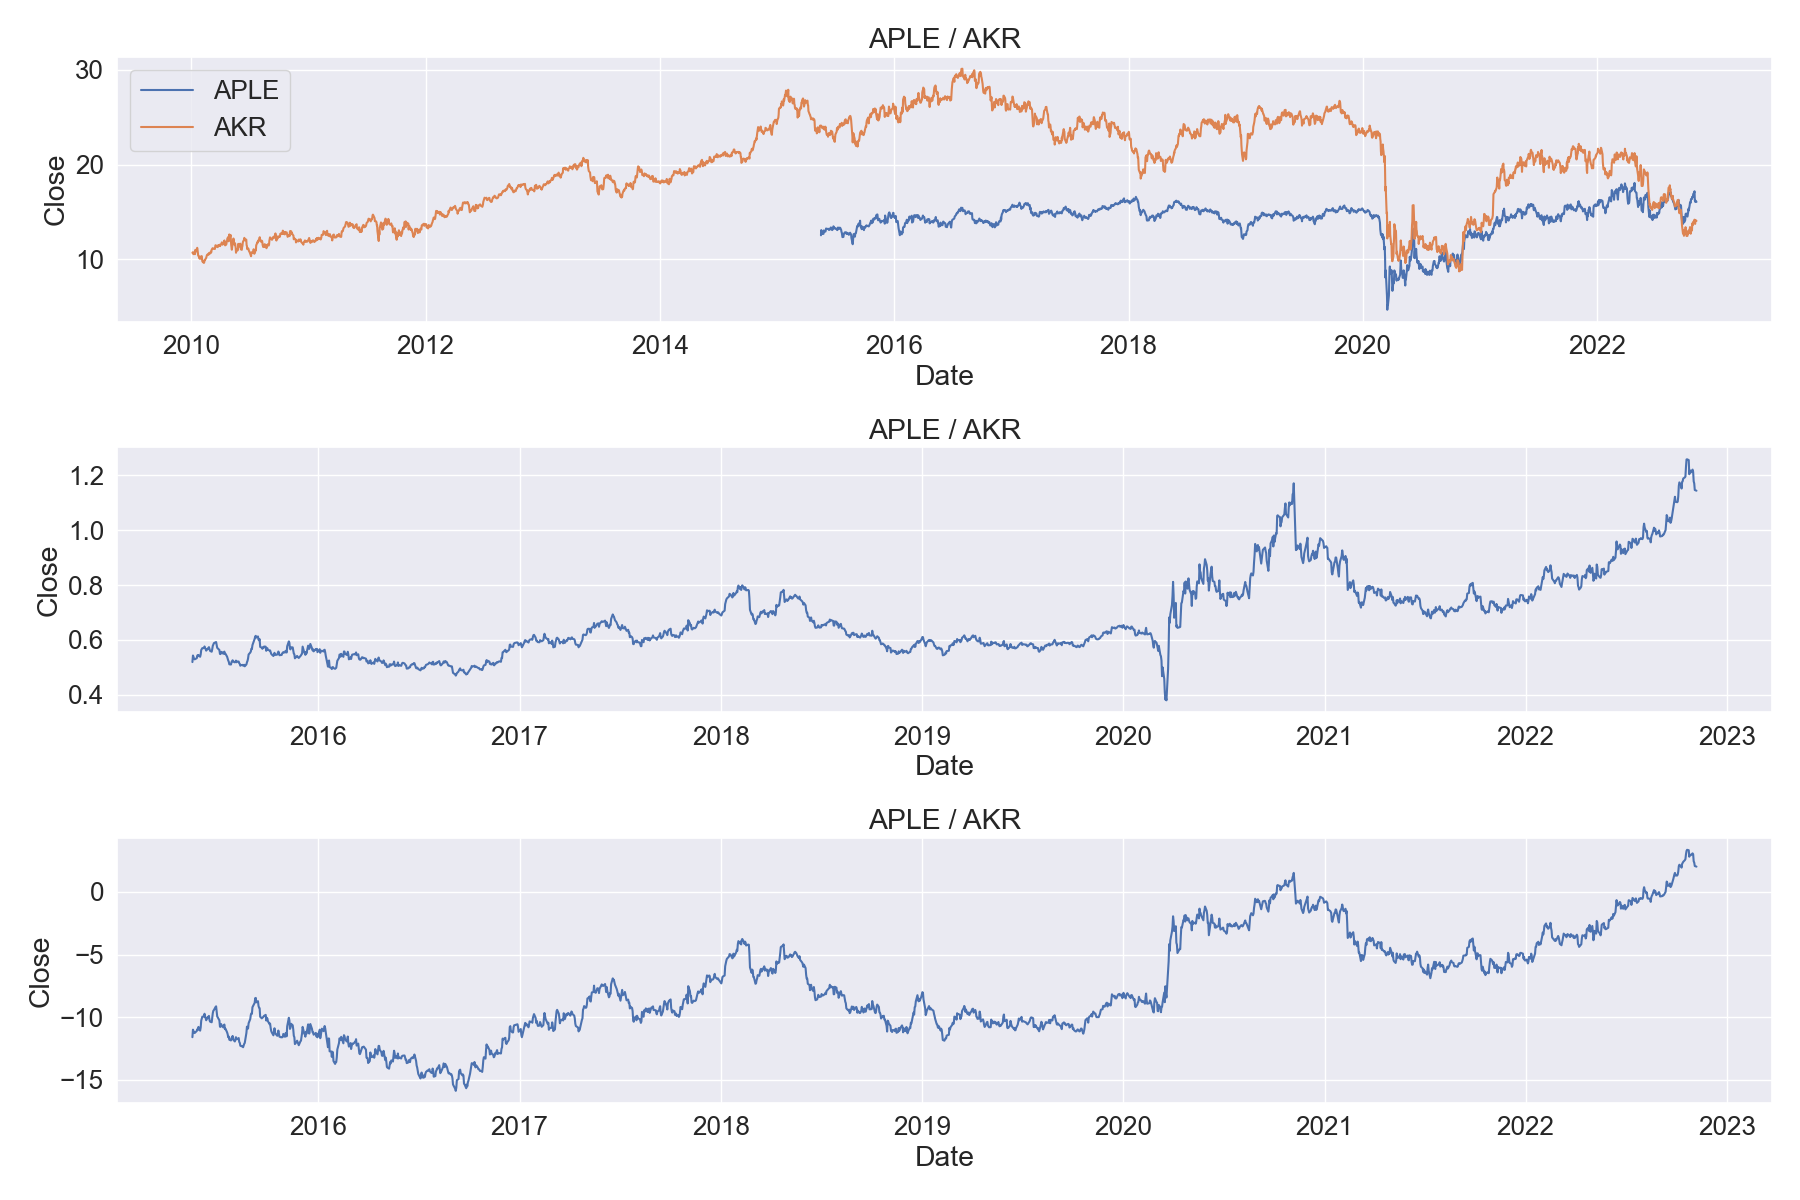

In [ ]:
pair('APLE', 'AKR');

Long BETA: 0.37
Short BETA: 0.97


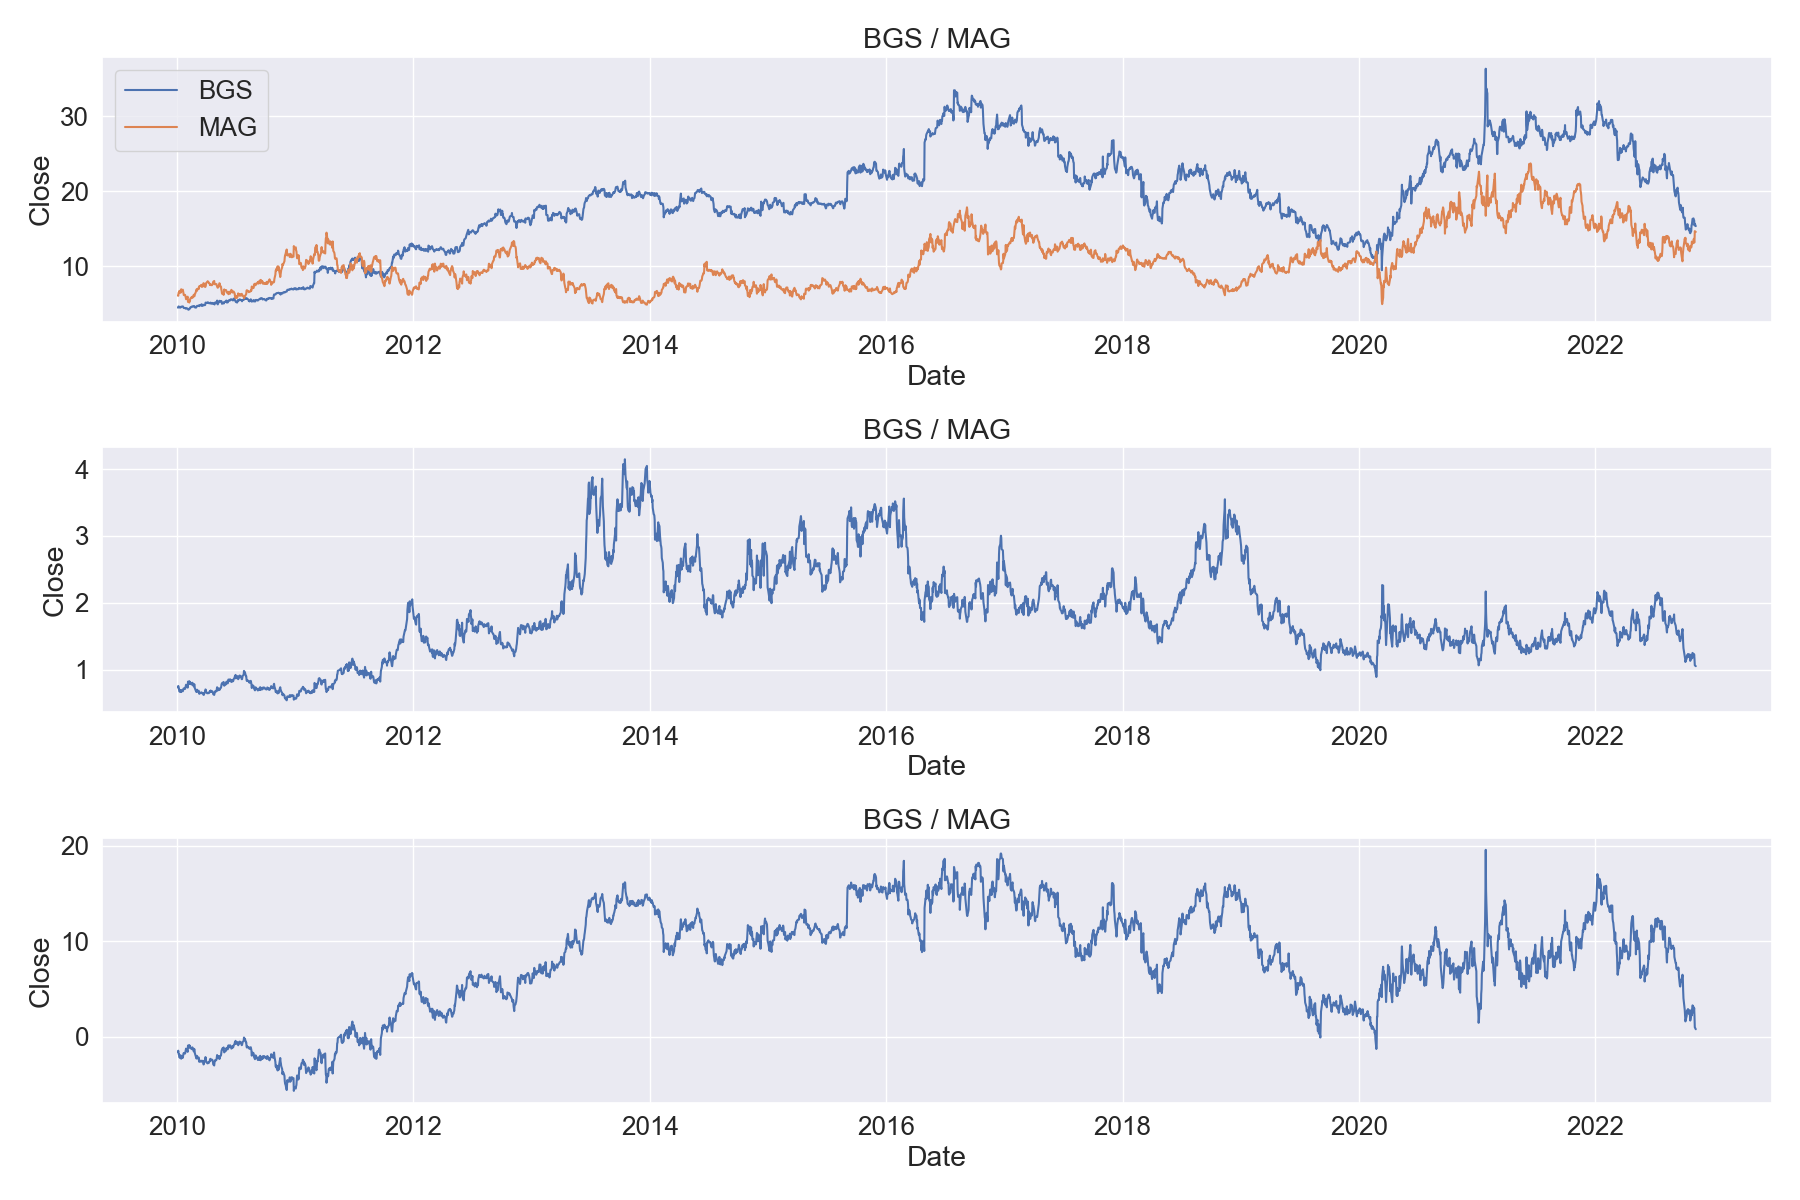

In [ ]:
pair('BGS', 'MAG');

Long BETA: 1.91
Short BETA: 1.06


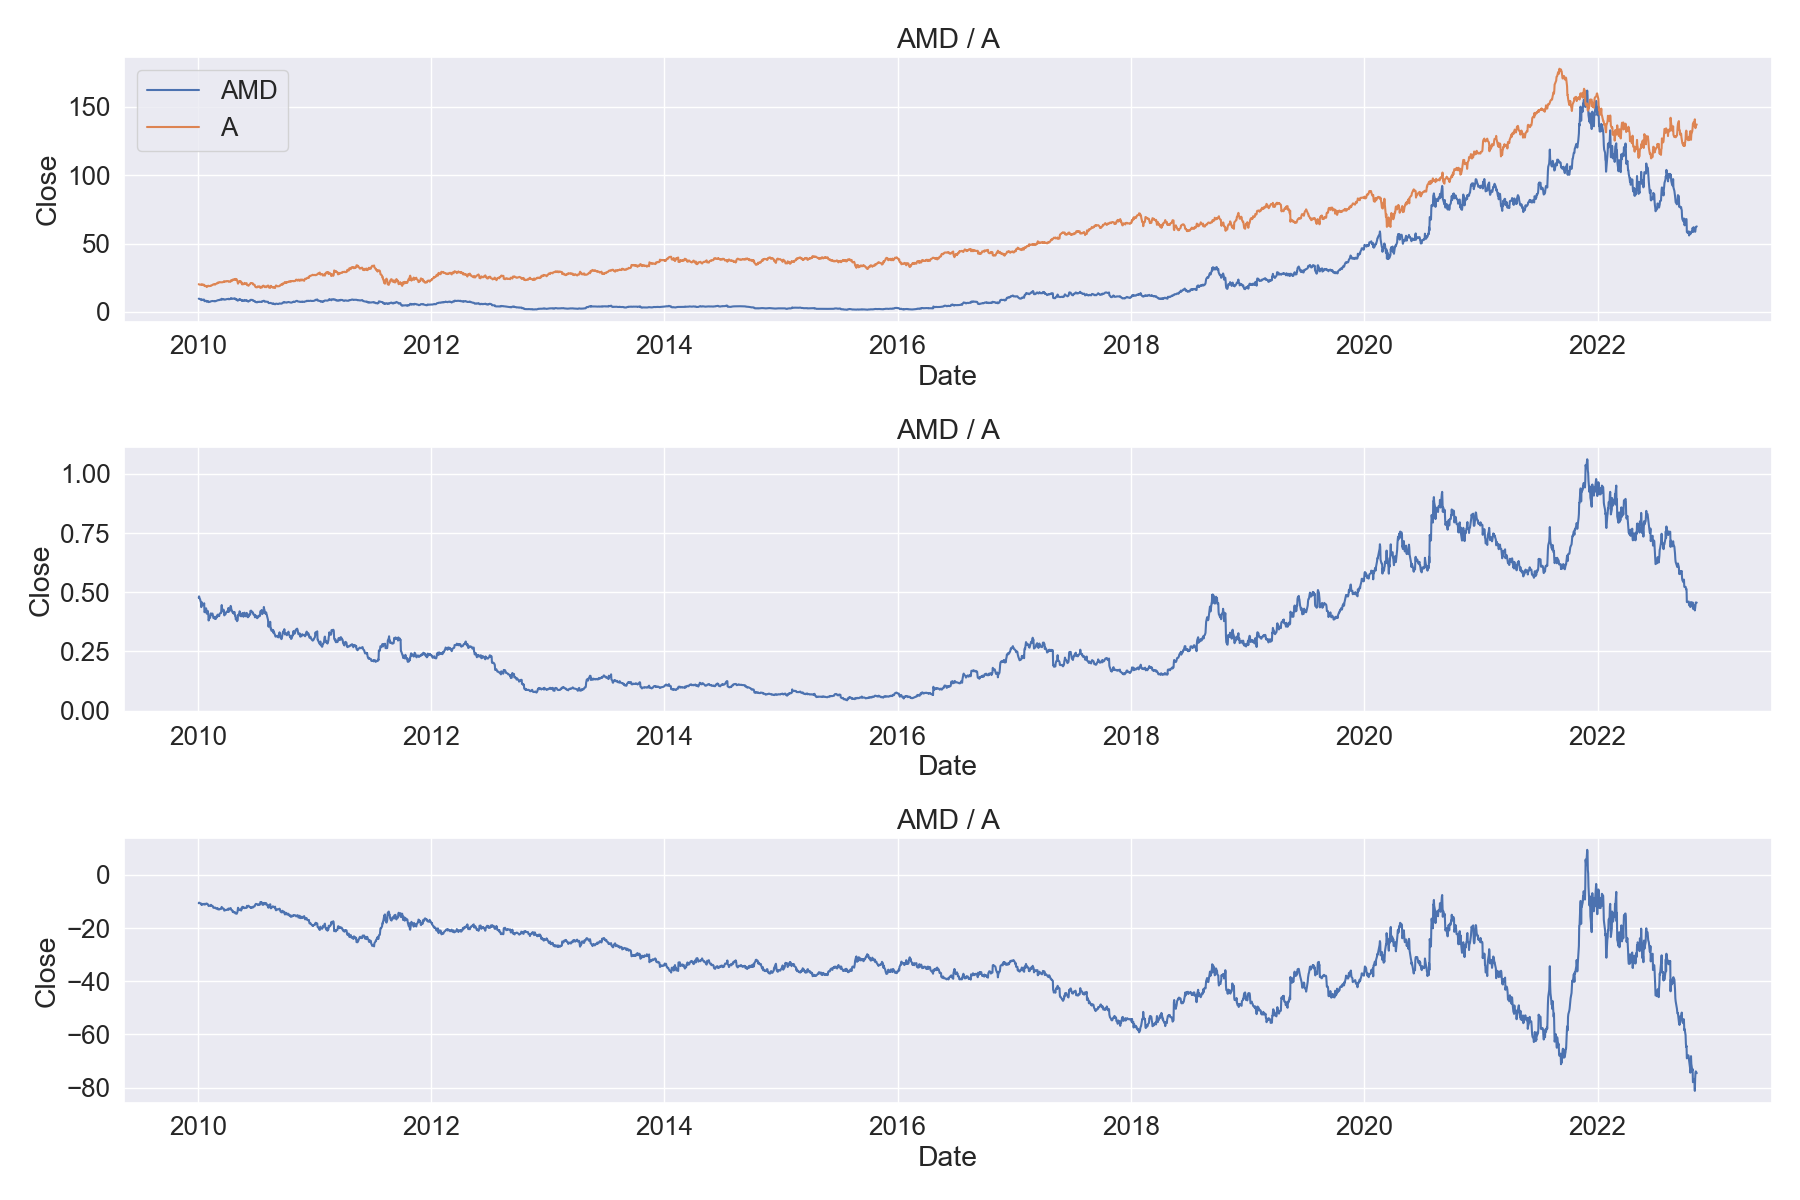

In [ ]:
pair('AMD', 'A');

Long BETA: 1.52
Short BETA: 1.27


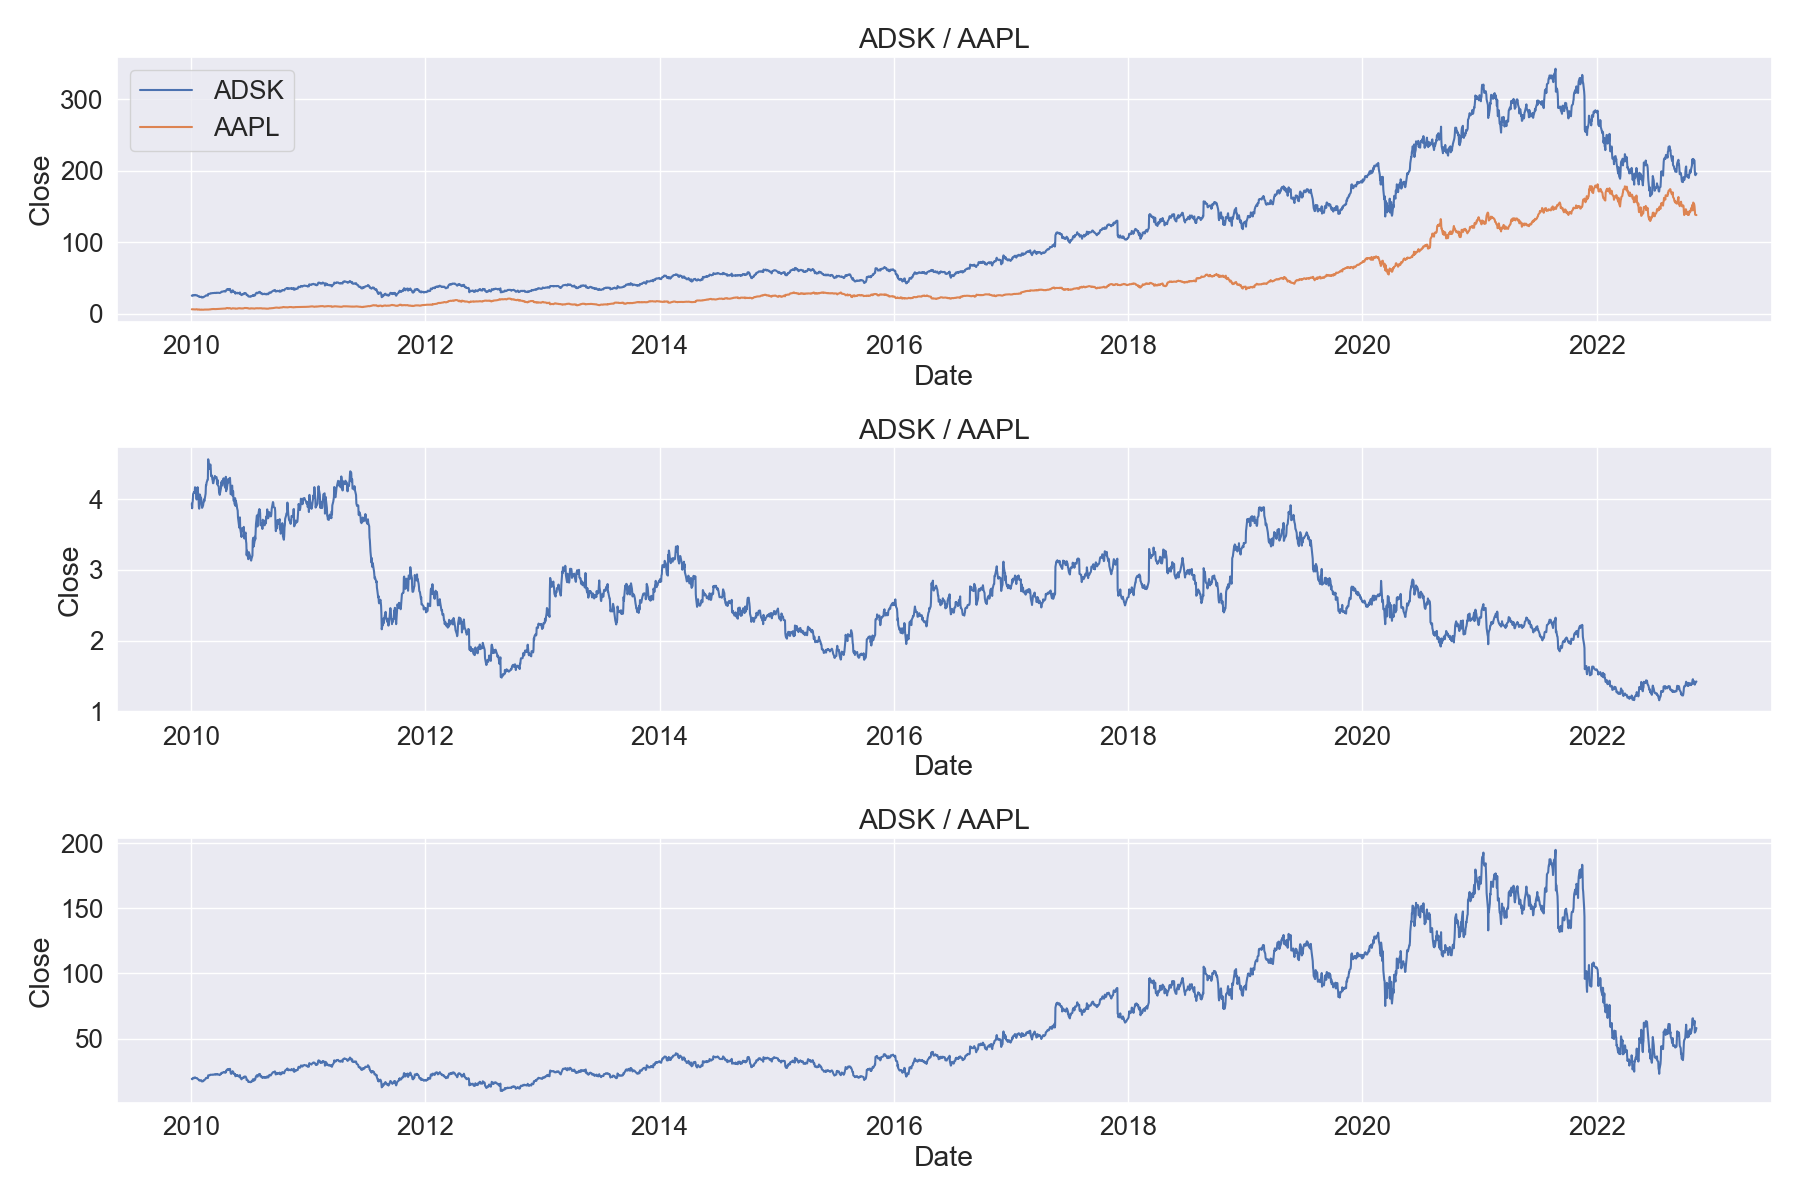

In [ ]:
pair('ADSK', 'AAPL');

Long BETA: 1.8
Short BETA: 1.27


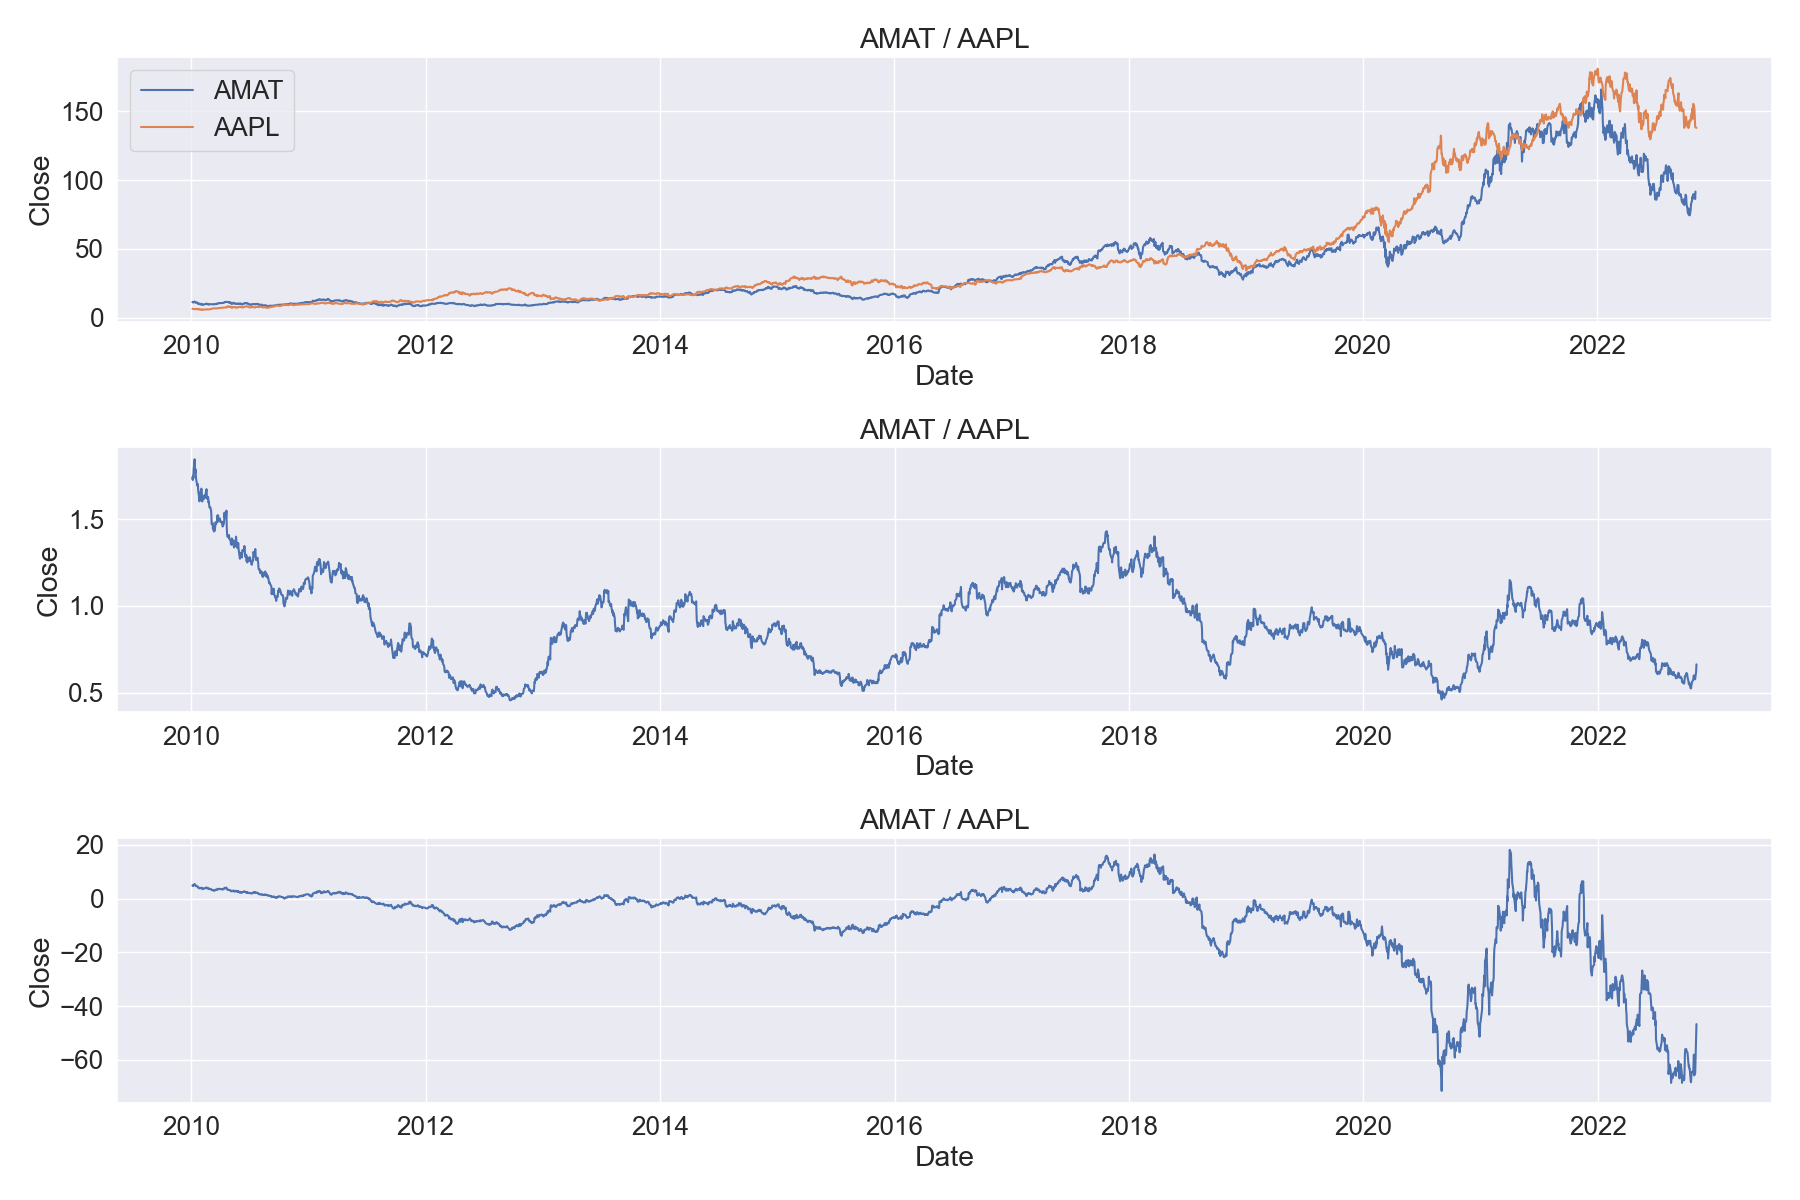

In [ ]:
pair('AMAT', 'AAPL');

Long BETA: 1.28
Short BETA: 1.06


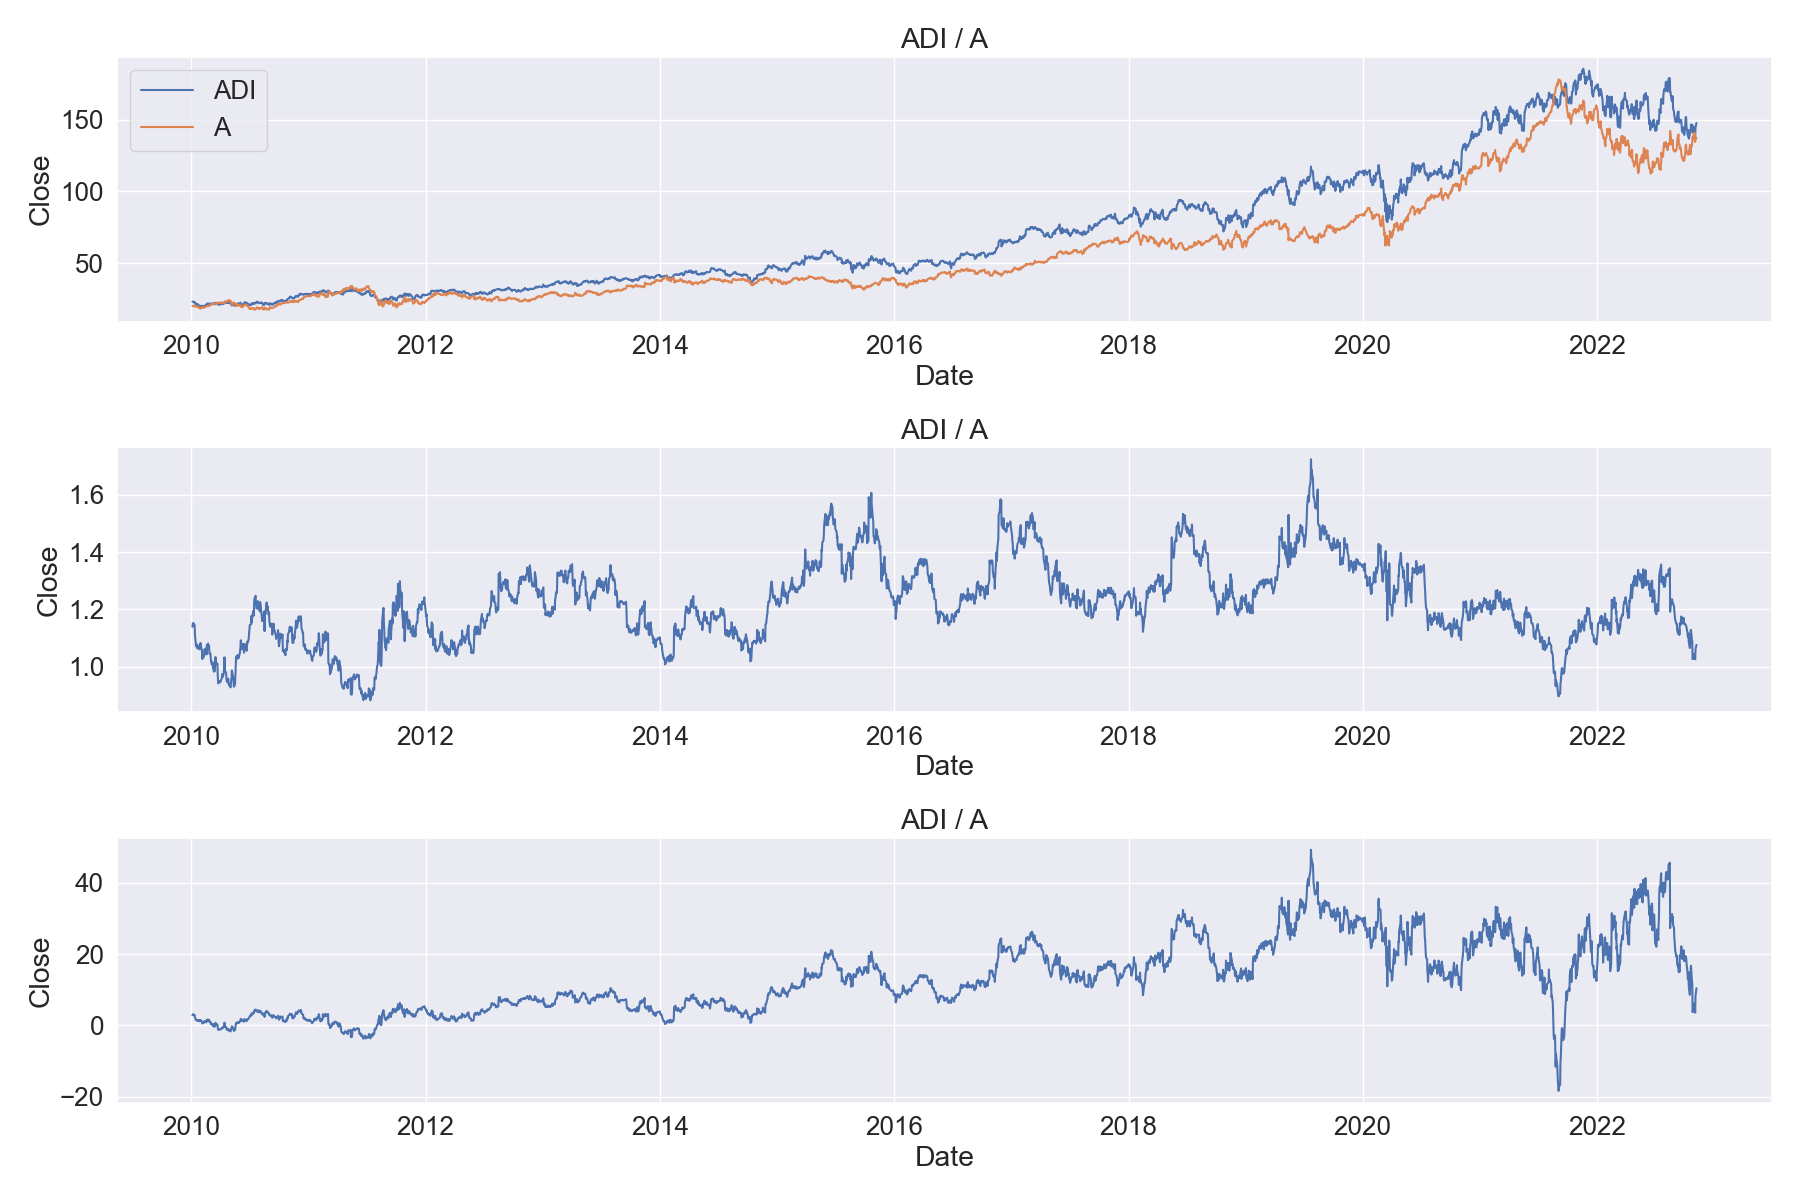

In [ ]:
pair('ADI', 'A');

Long BETA: 0.94
Short BETA: 0.53


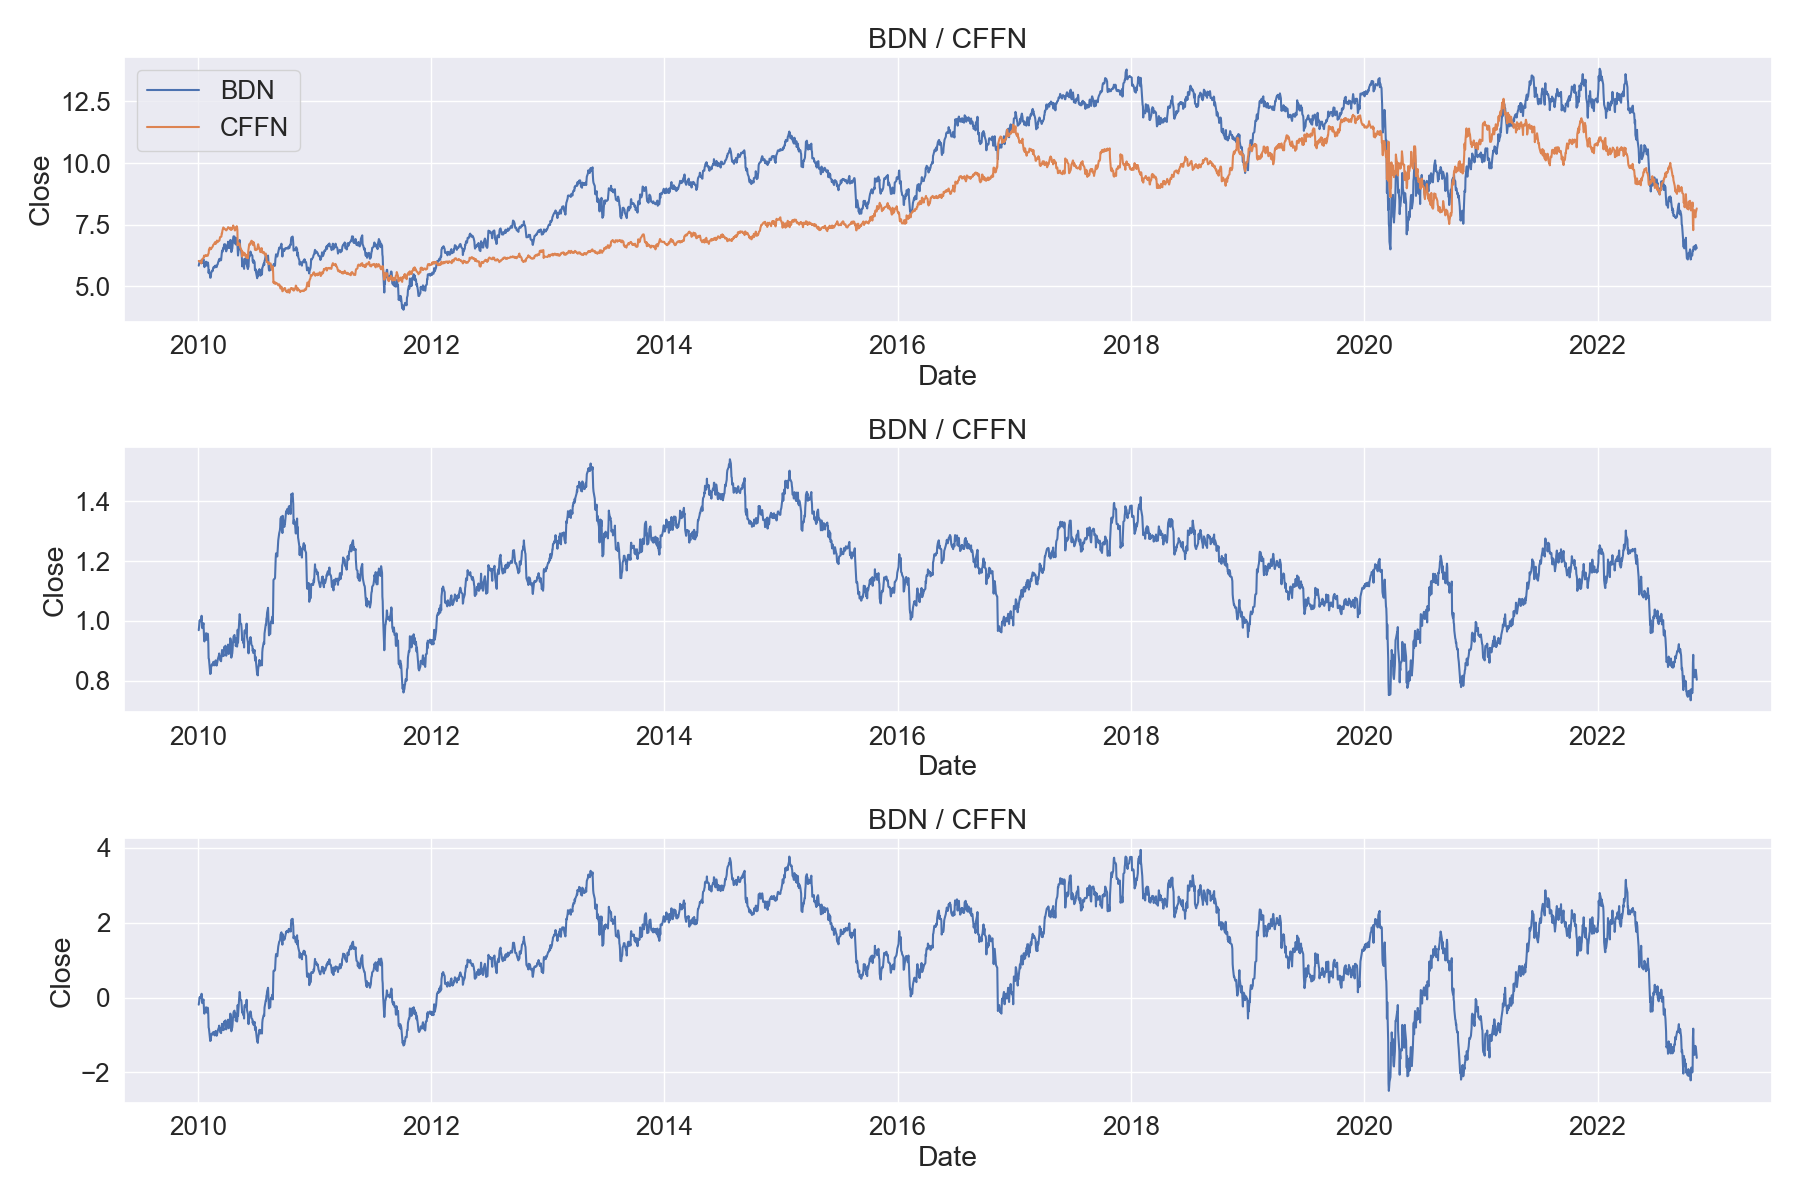

In [ ]:
pair('BDN', 'CFFN');

Long BETA: 1.16
Short BETA: 0.53


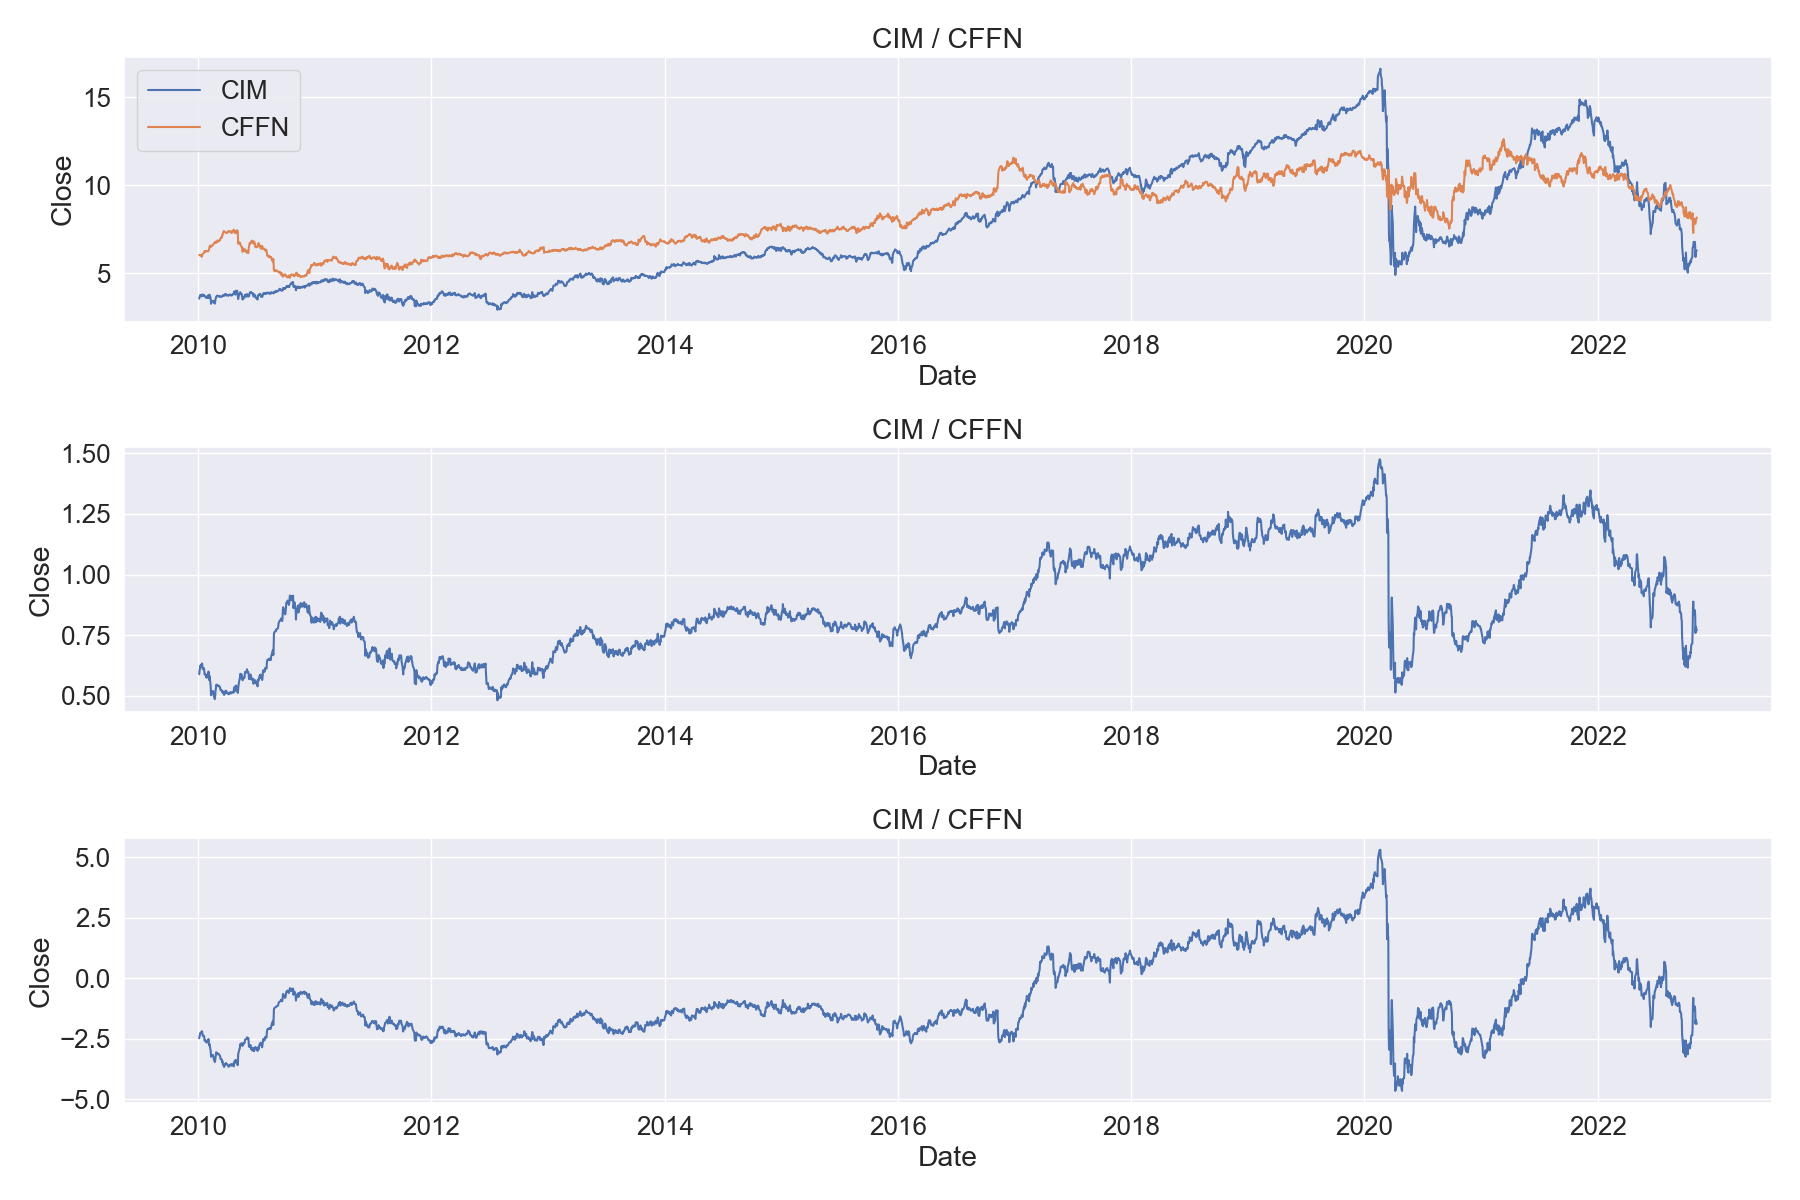

In [ ]:
pair('CIM', 'CFFN');

Long BETA: 0.75
Short BETA: 0.75


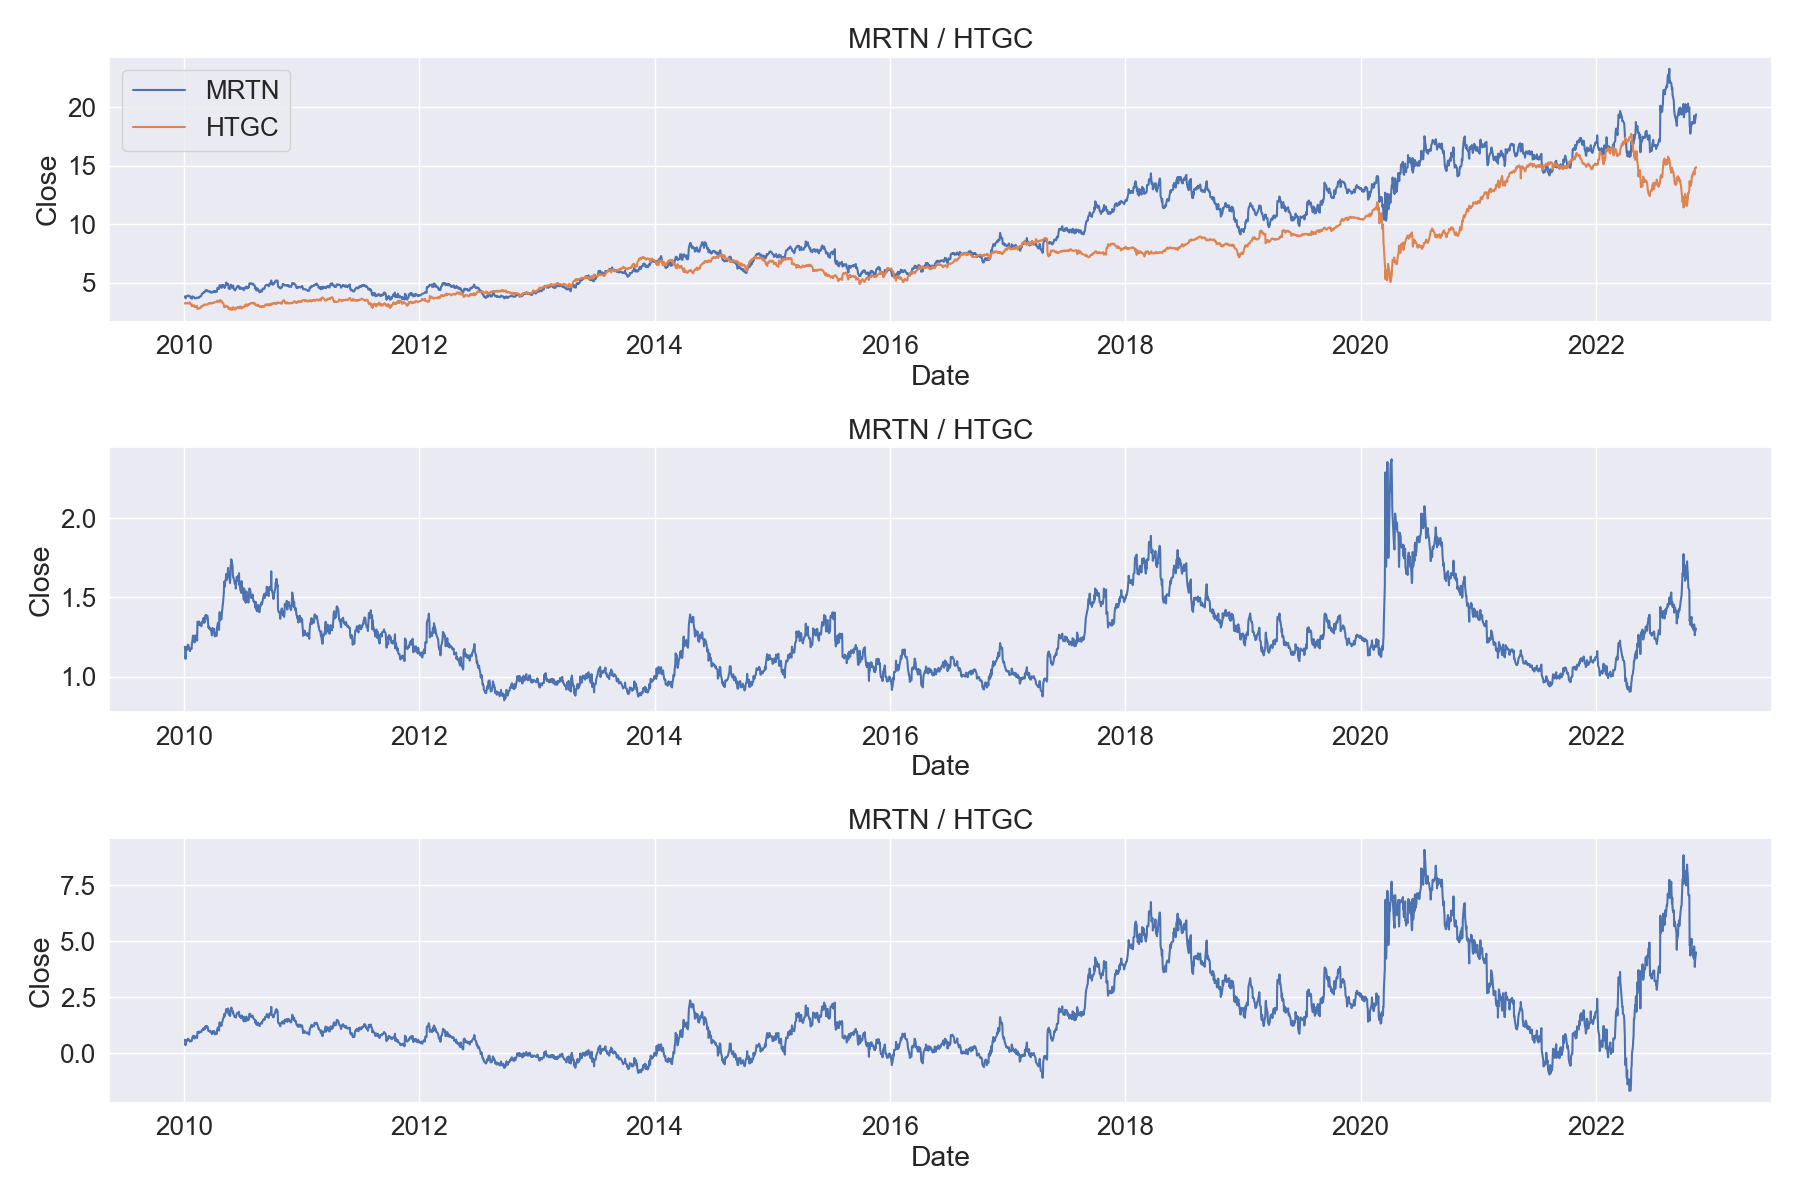

In [ ]:
pair('MRTN', 'HTGC');

Long BETA: 1.04
Short BETA: 1.19


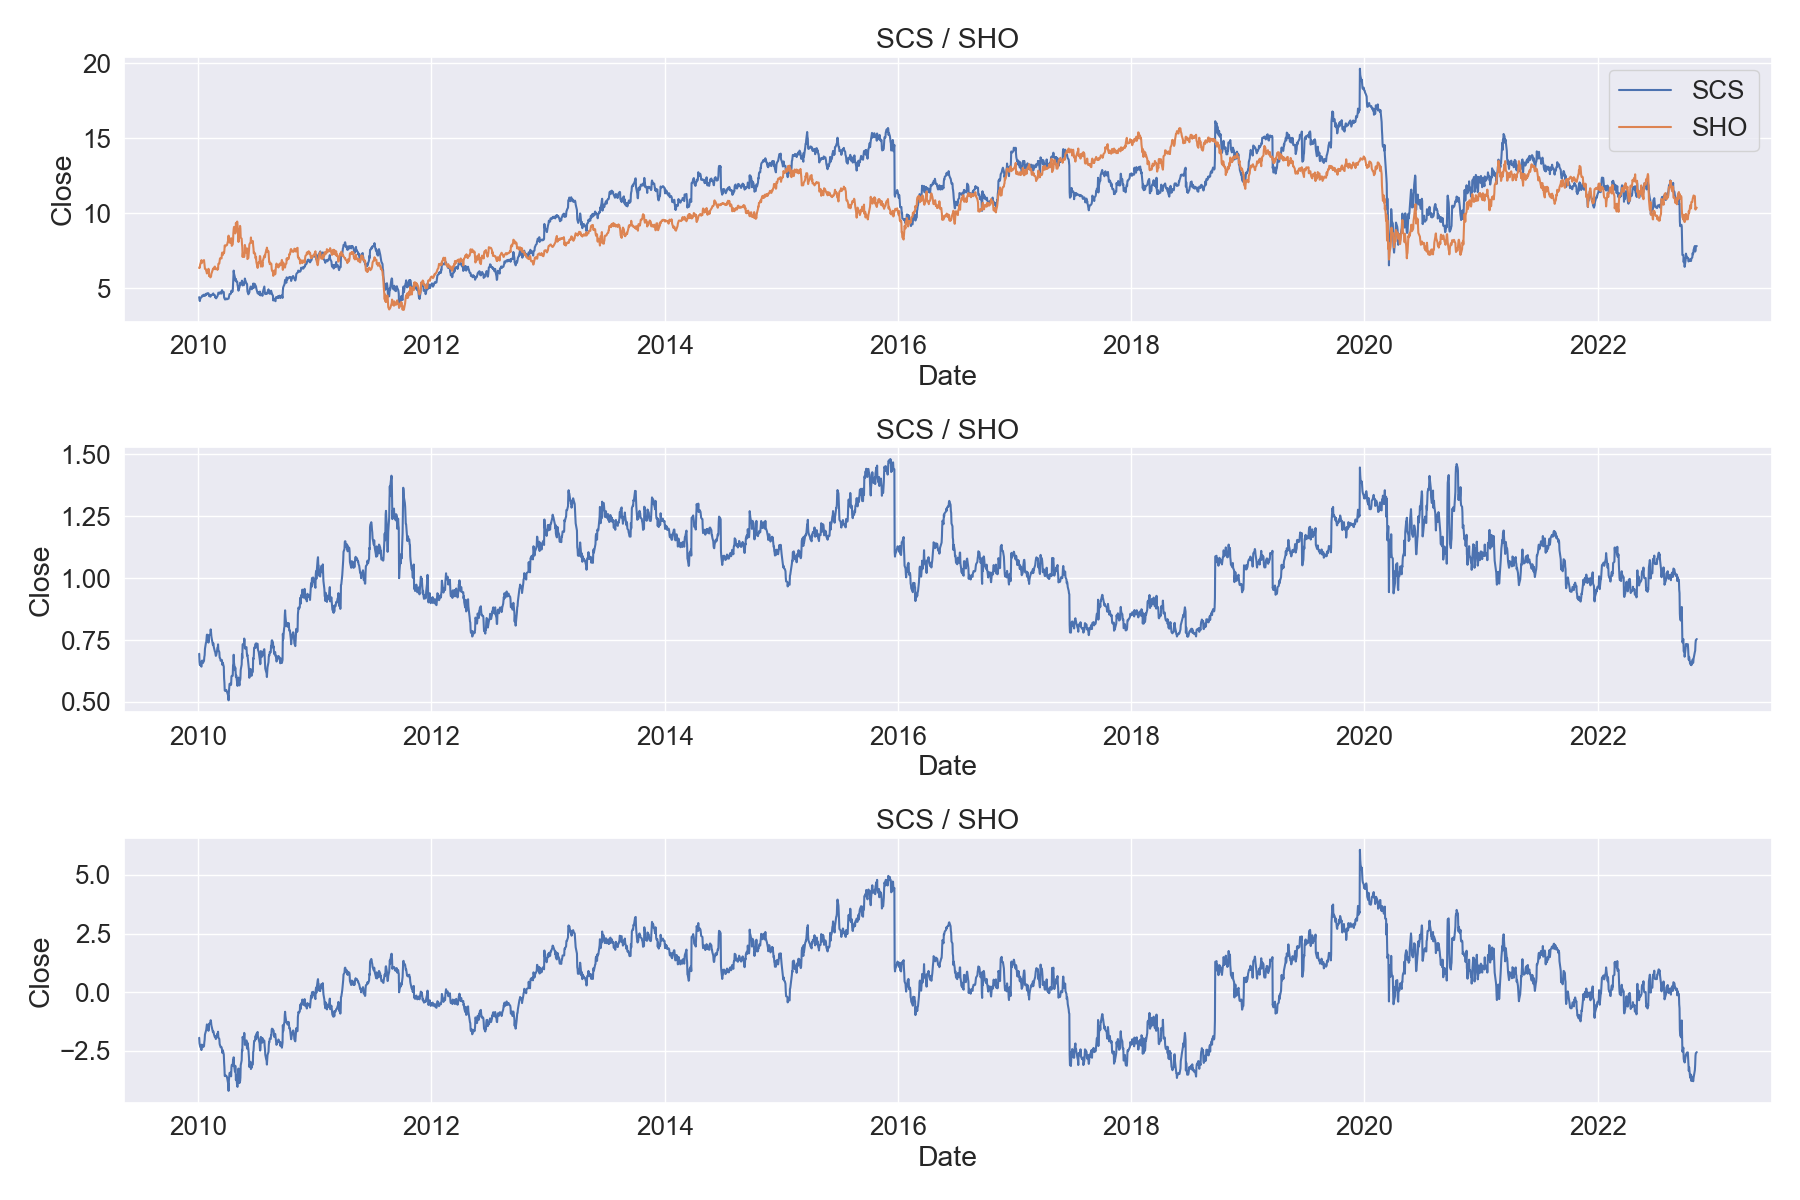

In [ ]:
pair('SCS', 'SHO');

Long BETA: 0.75
Short BETA: 0.78


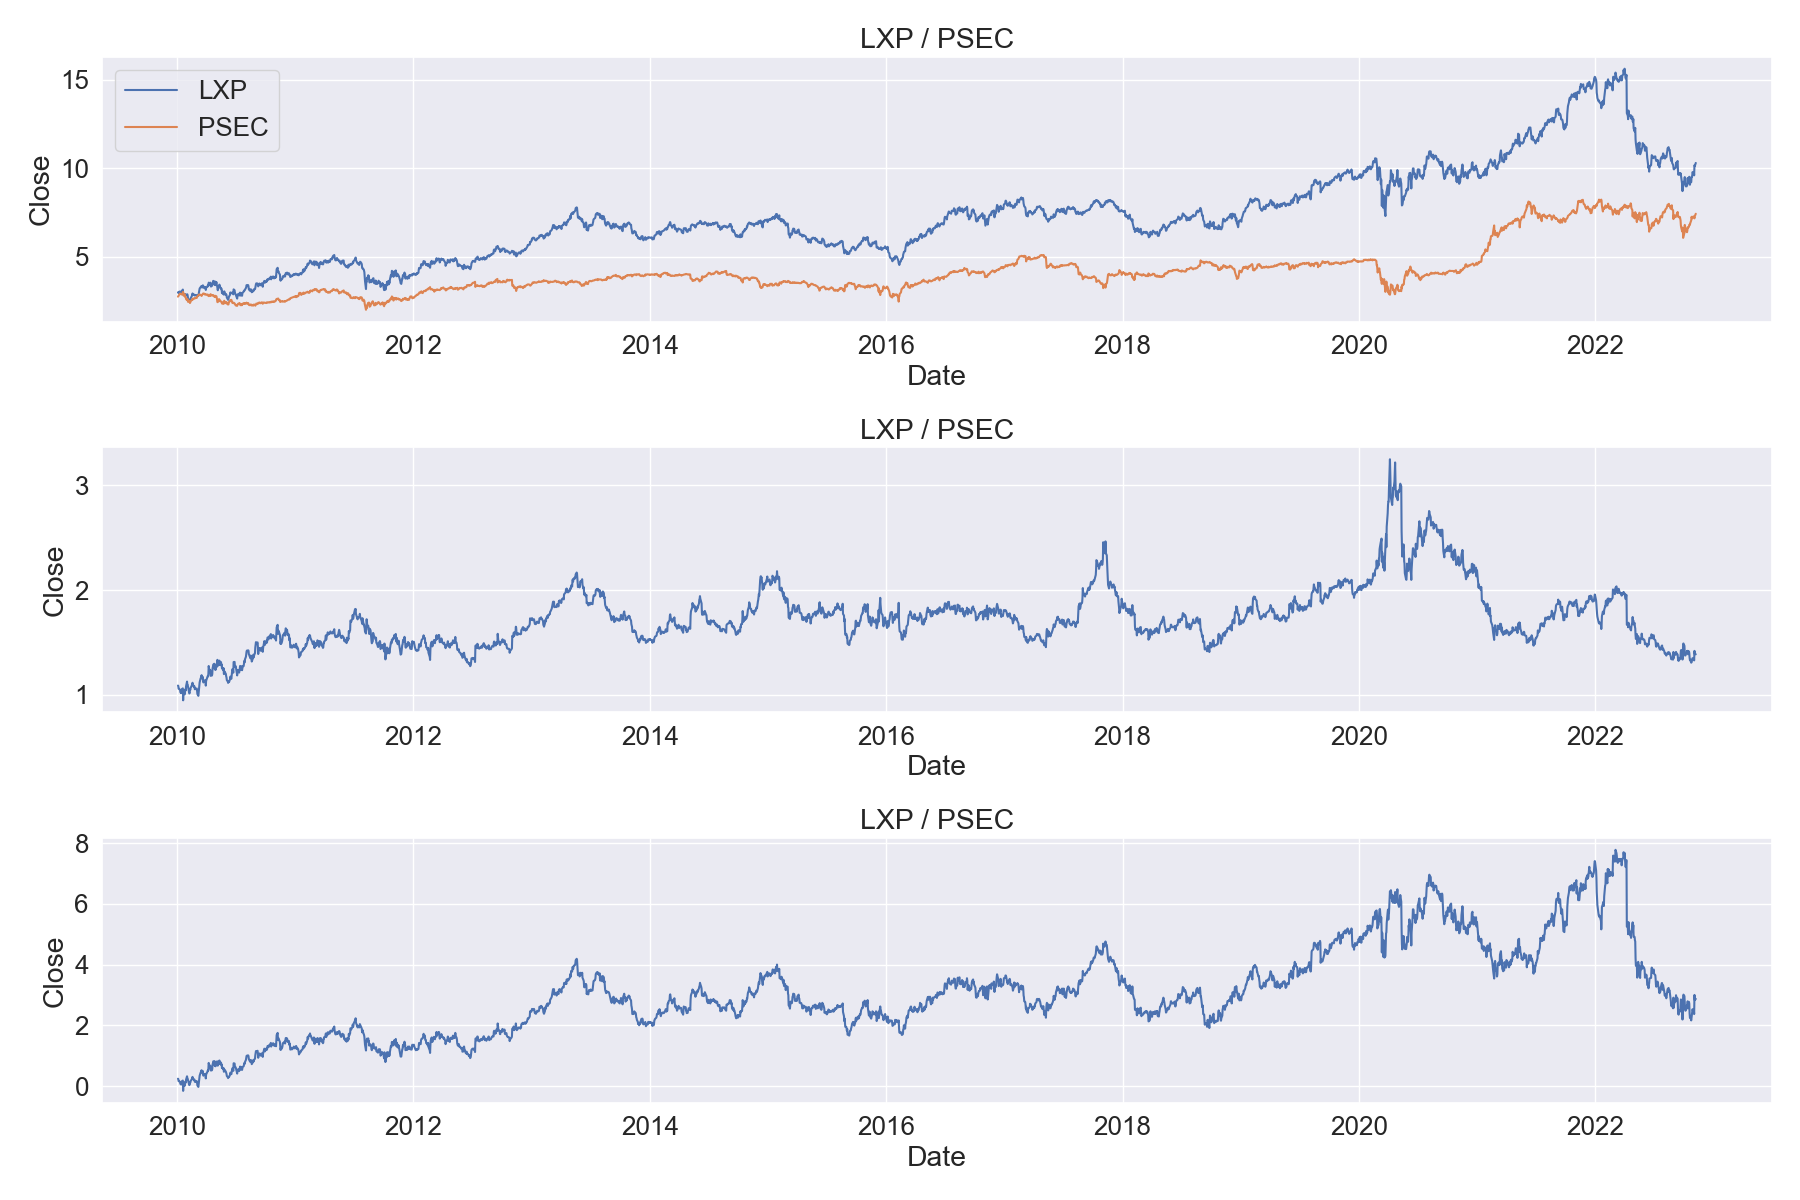

In [ ]:
pair('LXP', 'PSEC');